In [18]:
import pandas as pd
import numpy as np
import scipy.stats as si
import sympy as sy
from sympy.stats import Normal, cdf
from sympy import init_printing
init_printing()

#### Question number 1) Options
* Block number 1A shows the reception of updated Tel Aviv Index 35 data
* Block number 1B introduces a function to display the B&S value for a Call stock
* Block number 1C shows the use of the function and the display of the result for a certain option, the option name is 1800 and has five days of expiration according to the rules of the function
* Block number 1D shows the link of the appropriate website for obtaining information (using read_html)
* A. Check if the B&S value is appropriate and how far it passes an option named: 'C 001530 W3', its expiration days according to the rules out of 365:
* A1. W1=5
* A1. W2=10
* A1. W3=15
* A1. JUN=20
* Note: r, sigma are fixed according to the example
* It can be assumed that the fixed position of the option name (Strike) is from position 9 to 15, the position of the week number is from position 17 to 18

* Display in a unique way the options that start with the letter C, i.e. call options, and in a unique list the options that start with the letter P, i.e. put options
* View a unique listing called NearTheMoney
* Purpose to display options close to the money (defined as the 35 index found in the variable Madad35Rate
* Close to the money will be defined by us at a distance of 50 points above and below the Tel Aviv 35 index found in the variable Madad35Rate
* Note for help in running over the names of the papers, it can be assumed that [1:8] is the position of the strike value (Stirke)
​ 

In [19]:
# 1A :
# מדד ת"א-35 TA35 IDX
Madad35='https://www.globes.co.il/portal/instrument.aspx?instrumentid=980'
Madad35Rate=float(pd.read_html(Madad35)[5][1][1])
Madad35Rate

In [20]:
# 1B:
def euro_vanilla(S, K, T, r, sigma, option = 'call'):
    #S: spot price מדד תא 35
    #K: strike price שם האופציה
    #T: time to maturity ימים לפקיעה
    #r: interest rate   ריבית חסרת סיכון פריים
    #sigma: volatility of underlying asset  סטיית התקן (תלמדו בקורס נגזרים) ניקח ערך קבוע 0.25
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    if option == 'call':
        result = (S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
    if option == 'put':
        result = (K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - S * si.norm.cdf(-d1, 0.0, 1.0))
    return result*100

In [21]:
# 1C:
BS_Result=euro_vanilla(Madad35Rate, 1800, 5/365, 0.0185, 0.25)
BS_Result

In [22]:
# 1D:
BizData ='https://www.bizportal.co.il/shukhahon/sh_maof.shtml?Sug=41&stage=tr&mbase=0'
BizCalc='https://www.bizportal.co.il/shukhahon/sh_maof.shtml?Sug=41&stage=calc&mbase=0'

In [23]:
# שער הנייר :
BD=pd.read_html(BizData)[0][['שם נייר','שער']]
BD
Chk=BD['שם נייר']=='C 001530 W3'
BD.loc[Chk]

,שם נייר,שער


In [24]:
# שווי B&S :
BC=pd.read_html(BizCalc)[0][['שם נייר','שווי B&S']]
BC
Chk=BC['שם נייר']=='C 001530 W3'
BC.loc[Chk]

,שם נייר,שווי B&S


In [25]:
CallList=[];PutList=[];NearTheMoney=[]
for i in BC['שם נייר']:
    if str(i)[0]=='C':
        CallList.append(i)
    else:
        PutList.append(i)
    try:
        if int(str(i)[1:8])>(Madad35Rate-50) and int(str(i)[1:8])<(Madad35Rate+50):
            NearTheMoney.append(i)
    except:
        pass
# CallList
# PutList
NearTheMoney

#### Question number 2) Analysis of stock returns
* If necessary, install block 2A
* Run block number 2B
* Consolidate results of 'Adj Close' in one database called AdjCloseStock
* View updated closing price table
* View yield table
* Show returns graph only passes LCID share
* These parameters must be used when creating the graph:
* 1.figsize=(25,5)
* 2. linestyle=':'
* 3. With the help of a small marker
* 4. In blue markerfacecolor
* 5. markersize=8

In [26]:
# 2A:
#!pip install yfinance

In [27]:
# 2B:
import yfinance as yf
from datetime import datetime
start_date = datetime(2021, 1, 1)
end_date = datetime(2021, 12, 31)
tickers=['AMZN','TSLA','LCID','V',]

In [28]:
AllStock= []
for ticker in tickers:
    try:
        prices = yf.download(ticker,start_date,end_date)['Adj Close']
        prices = pd.DataFrame(prices)
        prices.columns = [ticker]
        AllStock.append(prices)
    except:
        pass
    AdjCloseStock = pd.concat(AllStock,axis=1)
AdjCloseStock.sort_index(inplace=True)
AdjCloseStock.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AMZN,TSLA,LCID,V
Date,,,,
2020-12-31,162.846497,235.223328,10.01,214.062561
2021-01-04,159.331497,243.256668,10.04,213.113297
2021-01-05,160.925507,245.036667,10.02,209.932617
2021-01-06,156.919006,251.993332,10.01,208.082962
2021-01-07,158.108002,272.013336,10.03,209.247589


In [29]:
Stock_returns=AdjCloseStock.pct_change()[1:]
Stock_returns.head()

,AMZN,TSLA,LCID,V
Date,,,,
2021-01-04,-0.021585,0.034152,0.002997,-0.004435
2021-01-05,0.010004,0.007317,-0.001992,-0.014925
2021-01-06,-0.024897,0.028390,-0.000998,-0.008811
2021-01-07,0.007577,0.079447,0.001998,0.005597
2021-01-08,0.006496,0.078403,0.000000,0.007670


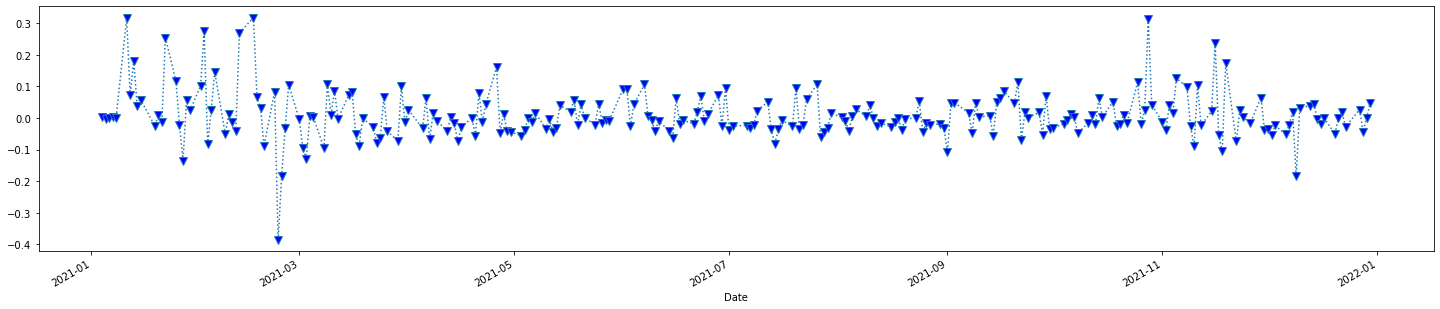

In [30]:
Stock_returns['LCID'].plot(figsize=(25,5), linestyle=':', marker='v', markerfacecolor='blue',markersize=8);

#### Question number 3) Analysis of financial data
* Section A)
    * Show from the returns file only the positive AMZN returns and sum them
    * Show from the returns file only the negative AMZN returns and sum them
    * Show the difference between the sum of the positive and negative returns
* section b)
    * Show the sum of returns in all four shares in the months of October to December 2021
    * Show return amount for each share in the period and for all shares together

In [31]:
Plus=Stock_returns[Stock_returns['AMZN']>0]['AMZN']
Minus=Stock_returns[Stock_returns['AMZN']<0]['AMZN']
print(f'The amount of the positives : {Plus.sum()}\nThe amount of negatives     : {Minus.sum()}')
print(f'The Diff is {Plus.sum()-Minus.sum()}')

The amount of the positives : 1.464990956487904
The amount of negatives     : -1.4010637224676465
The Diff is 2.8660546789555505


In [32]:
BeginDate = datetime(2021, 10, 1)
EndDate = datetime(2021, 12, 31)
Crt1=Stock_returns.index>=BeginDate
Crt2=Stock_returns.index<=EndDate
ByDate=Stock_returns.loc[Crt1 & Crt2]
print(f'Total each Stock from {BeginDate} till {EndDate}\n{ByDate.sum()}')
print()
print(f'Total All Stock from {BeginDate} till {EndDate}\n{ByDate.sum().sum()}')

Total each Stock from 2021-10-01 00:00:00 till 2021-12-31 00:00:00
AMZN    0.034222
TSLA    0.368437
LCID    0.582398
V      -0.007916
dtype: float64

Total All Stock from 2021-10-01 00:00:00 till 2021-12-31 00:00:00
0.9771416098529269
